In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime as dt

In [2]:
# importing the clean data set of all games since 2002 (outside of current season)
data_df = pd.read_csv(r'data\clean_data_set.csv', index_col='datetime')
data_df.drop('Unnamed: 0', axis = 1, inplace=True)
data_df = data_df.sort_values('datetime')

In [3]:
# creates dictionary of form {team : current elo score}, uses old dictionary to generate since typing out 32 names is tedious.
teams = {
    'crd' : 'ARI', 'atl' : 'ATL','rav' : 'BAL','buf' : 'BUF', 
    'car' : 'CAR', 'chi' : 'CHI', 'cin' : 'CIN', 'cle' : 'CLE', 
    'dal' : 'DAL', 'den' : 'DEN', 'det' : 'DET', 'gnb' : 'GNB', 
    'htx' : 'HOU', 'clt' : 'IND', 'jax' : 'JAX', 'kan' : 'KAN', 
    'sdg' : 'LAC', 'ram' : 'LAR', 'mia' : 'MIA', 'min' : 'MIN', 
    'nwe' : 'NWE', 'nor' : 'NOR', 'nyg' : 'NYG', 'nyj' : 'NYJ', 
    'rai' : 'LVR', 'phi' : 'PHI', 'pit' : 'PIT', 'sfo' : 'SFO', 
    'sea' : 'SEA', 'tam' : 'TAM', 'oti' : 'TEN', 'was' : 'WAS'
    
}

elo_dict = {}
elo_init_value = 1500
k = 35
for i in teams:
    elo_dict[teams[i]] = elo_init_value

In [4]:
# ELO Functions
def elo_expected(teamA, teamB):
    rating_A = elo_dict[teamA]
    rating_B = elo_dict[teamB]
    expected_A = 1 / (1 + 10 ** ((rating_B - rating_A) / 400 ))
    expected_B = 1 / (1 + 10 ** ((rating_A - rating_B) / 400 ))
    return [expected_A, expected_B]

def elo_update(teamA, teamB, winner):
    elo_status = elo_expected(teamA, teamB)
    if winner == 1:
        teamA_update = elo_dict[teamA] + k * (1 - elo_status[0])
        teamB_update = elo_dict[teamB] + k * (0 - elo_status[1])
    elif winner == 0:
        teamA_update = elo_dict[teamA] + k * (0 - elo_status[0])
        teamB_update = elo_dict[teamB] + k * (1 - elo_status[1])
    else: # this deals with tie games, just returns the original ELO score
        teamA_update = elo_dict[teamA]
        teamB_update = elo_dict[teamB]
    return [teamA_update, teamB_update]

In [5]:
data_df.head()

,team,season,opp,day_week,week,W/L,ot,record,home/away,team_score,...,team_rush_yards,team_turnover,1D_allowed,opp_total_yards,opp_pass_yards,opp_rush_yards,opp_turnover,offense_expected_points,defense_expected_points,sp_expected_points
datetime,,,,,,,,,,,,,,,,,,,,,
2002-09-05 20:38:00,NYG,2002,SFO,Thu,1,0.0,0.0,0-1,HOME,13.0,...,43.0,3.0,13.0,279.0,166.0,113.0,1.0,-4.72,-0.79,3.46
2002-09-08 13:04:00,CAR,2002,BAL,Sun,1,1.0,0.0,1-0,HOME,10.0,...,145.0,0.0,15.0,289.0,212.0,77.0,1.0,-4.38,6.68,4.20
2002-09-08 13:04:00,CHI,2002,MIN,Sun,1,1.0,0.0,1-0,HOME,27.0,...,80.0,2.0,19.0,368.0,228.0,140.0,3.0,6.37,-1.20,1.01
2002-09-08 13:04:00,CLE,2002,KAN,Sun,1,0.0,0.0,0-1,HOME,39.0,...,59.0,1.0,24.0,470.0,276.0,194.0,1.0,15.18,-17.94,1.15
2002-09-08 13:04:00,BUF,2002,NYJ,Sun,1,0.0,1.0,0-1,HOME,31.0,...,142.0,3.0,18.0,266.0,193.0,73.0,1.0,3.16,0.59,-7.81


In [6]:
# adds columns for ELOs before and after
team_1_elo_before = []
team_1_elo_after = []
team_2_elo_before = []
team_2_elo_after = []
counter = 0

for i in range(len(data_df)):
    team_1_elo_before.append(elo_dict[data_df['team'][counter]])
    team_2_elo_before.append(elo_dict[data_df['opp'][counter]])
    updated_elo = elo_update(data_df['team'][counter], data_df['opp'][counter], data_df['W/L'][counter])
    team_1_elo_after.append(updated_elo[0])
    team_2_elo_after.append(updated_elo[1])
    elo_dict[data_df['team'][counter]] = updated_elo[0]
    elo_dict[data_df['opp'][counter]] = updated_elo[1]
    counter += 1
    
data_df['team_elo_before'] = team_1_elo_before
data_df['team_elo_after'] = team_1_elo_after
data_df['opp_elo_before'] = team_2_elo_before
data_df['opp_elo_after'] = team_2_elo_after

In [7]:
data_df.tail(5)

,team,season,opp,day_week,week,W/L,ot,record,home/away,team_score,...,opp_pass_yards,opp_rush_yards,opp_turnover,offense_expected_points,defense_expected_points,sp_expected_points,team_elo_before,team_elo_after,opp_elo_before,opp_elo_after
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-03 13:00:00,HOU,2020,TEN,Sun,17,NaN,0.0,NaN,HOME,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,1493.150706,1493.150706,1616.337140,1616.337140
2021-01-03 13:00:00,PHI,2020,WAS,Sun,17,NaN,0.0,1,HOME,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,1530.037033,1530.037033,1339.547777,1339.547777
2021-01-03 16:25:00,DEN,2020,LVR,Sun,17,NaN,0.0,NaN,HOME,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,1456.027121,1456.027121,1447.441514,1447.441514
2021-01-03 16:25:00,LAR,2020,ARI,Sun,17,NaN,0.0,NaN,HOME,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,1603.925264,1603.925264,1459.927964,1459.927964
2021-01-03 16:25:00,SFO,2020,SEA,Sun,17,NaN,0.0,NaN,HOME,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,1581.481010,1581.481010,1641.543490,1641.543490


In [8]:
data_df.to_csv(r'data\elo_data_set.csv')

In [9]:
for i in elo_dict:
    print(i, ' : ', elo_dict[i])

ARI  :  1459.9279642463762
ATL  :  1451.007230530648
BAL  :  1685.2665702955253
BUF  :  1537.921187468186
CAR  :  1420.3511165489085
CHI  :  1550.701254987177
CIN  :  1282.024704705823
CLE  :  1424.2634894354524
DAL  :  1469.1268359191702
DEN  :  1456.0271210708752
DET  :  1400.851536890785
GNB  :  1644.6202515621333
HOU  :  1493.1507062869173
IND  :  1487.6876259455257
JAX  :  1320.3091277760034
KAN  :  1743.2924385242543
LAC  :  1427.9762425275094
LAR  :  1603.9252637159614
MIA  :  1434.532342370103
MIN  :  1515.378677965869
NWE  :  1610.3029837003069
NOR  :  1659.672490798709
NYG  :  1314.2615007758175
NYJ  :  1318.121743534899
LVR  :  1447.4415141533284
PHI  :  1530.0370329670588
PIT  :  1629.9303155105695
SFO  :  1581.481010402072
SEA  :  1641.5434904818442
TAM  :  1502.981311330106
TEN  :  1616.3371401977786
WAS  :  1339.5477773743062


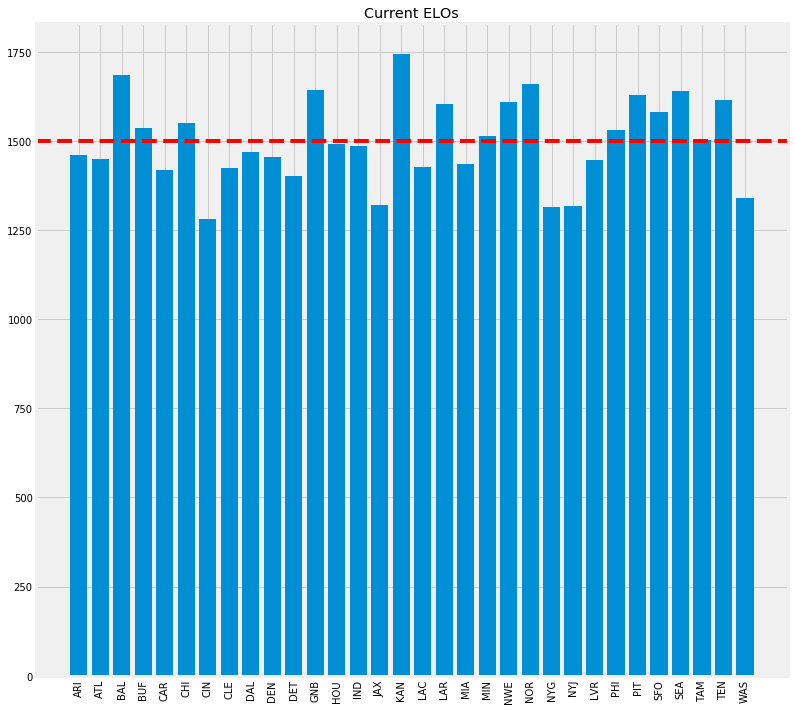

In [17]:
fig = plt.figure(figsize = (12,12))
plt.bar(elo_dict.keys(), elo_dict.values())
plt.xticks(rotation=90)
plt.title('Current ELOs')
plt.axhline(1500, color='r', linestyle='--')

plt.savefig('current_elos.png')
plt.show()